# Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

<code style="color:green">pip install vega_datasets</code>

**You can use this library like so:**


<code style="color:green">from vega_datasets import data</code>

**Call the sf_temps() dataset from the vega_datasets library like so:**


<code style="color:green">data.sf_temps()</code>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from vega_datasets import data

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df=df.set_index('date').sort_index()


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df_daily=df.resample('D').mean()
df_daily.head(3)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667


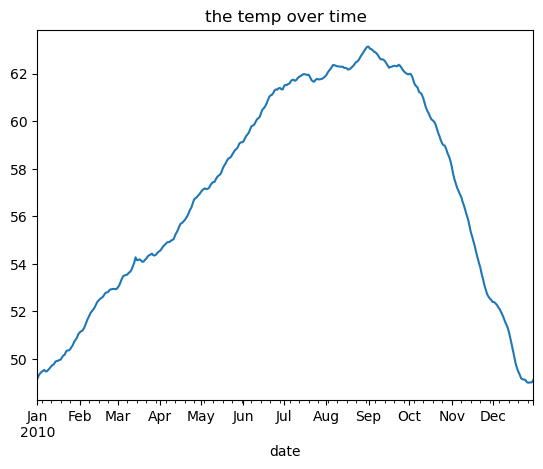

In [5]:
df_daily.temp.plot()
plt.title('the temp over time')
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

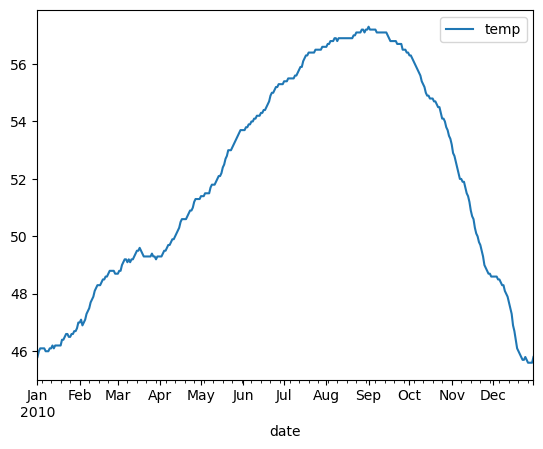

In [6]:
df.resample('D').min().plot()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

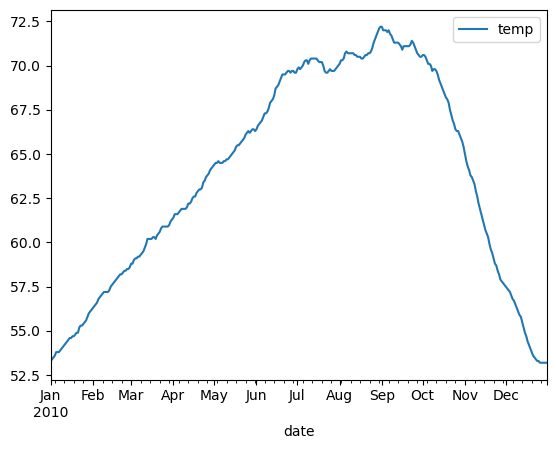

In [7]:
df.resample('D').max().plot()
plt.show()

4. Which month is the coldest, on average?

In [8]:
df.groupby(df.index.month_name()).mean().idxmin()

temp    January
dtype: object

5. Which month has the highest average temperature?

In [9]:
df.groupby(df.index.month_name()).mean().idxmax()

temp    September
dtype: object

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [10]:
df_agg=df.resample('M').agg(['min','max'])

In [11]:
df_agg['diff']=df_agg.temp['max'] -df_agg.temp['min']

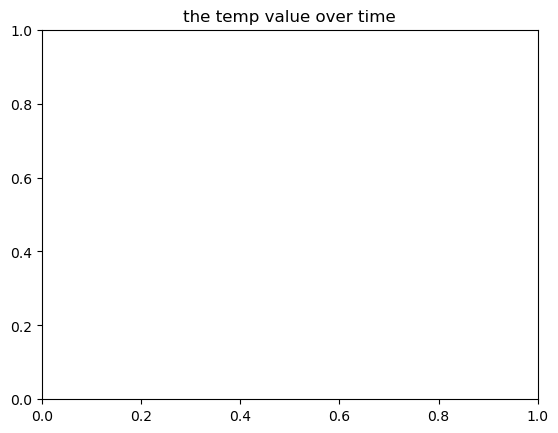

In [12]:
df.resample('D').agg(['min','max']).temp
plt.title('the temp value over time')
plt.show()

7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<code style="color:green">data.seattle_weather()</code>

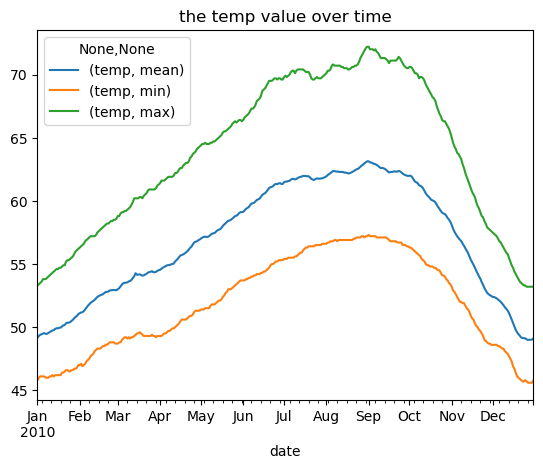

In [13]:
df.resample('D').agg(['mean','min','max']).plot()
plt.title('the temp value over time')
plt.show()

In [14]:
df=data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
df=df.set_index('date').sort_index()

In [16]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1. Which year and month combination has the highest amount of precipitation?

In [17]:
df['month'] = df.index.month_name()


<function matplotlib.pyplot.show(close=None, block=None)>

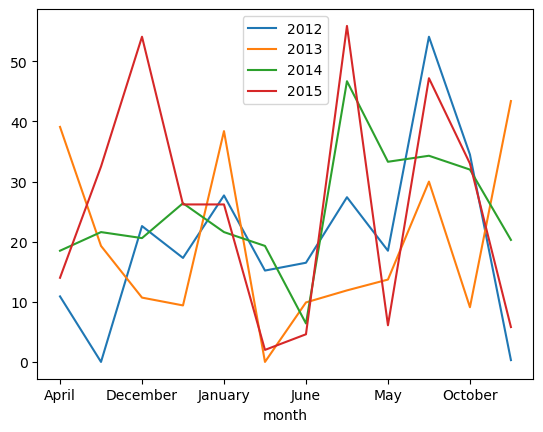

In [18]:
df12=df.loc['2012']
df13=df.loc['2013']
df14=df.loc['2014']
df15=df.loc['2015']

df12.groupby('month').precipitation.max().plot(label='2012')
df13.groupby('month').precipitation.max().plot(label='2013')
df14.groupby('month').precipitation.max().plot(label='2014')
df15.groupby('month').precipitation.max().plot(label='2015')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

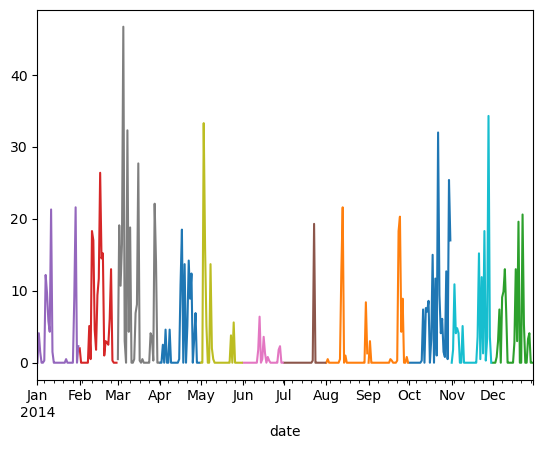

In [19]:
df14.groupby('month').precipitation.plot()
plt.show

2. Visualize the amount of monthly precipitation over time.

<function matplotlib.pyplot.show(close=None, block=None)>

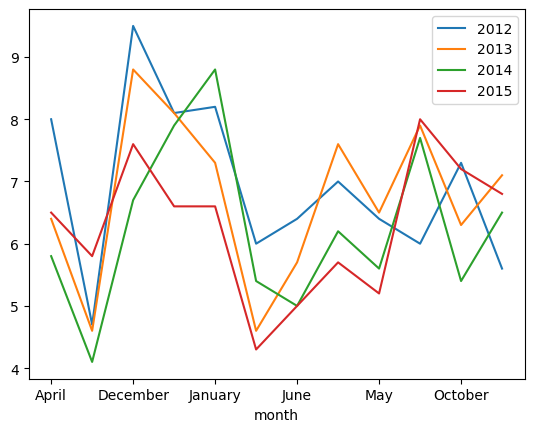

In [20]:
df12.groupby('month').wind.max().plot(label='2012')
df13.groupby('month').wind.max().plot(label='2013')
df14.groupby('month').wind.max().plot(label='2014')
df15.groupby('month').wind.max().plot(label='2015')
plt.legend()
plt.show

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<function matplotlib.pyplot.show(close=None, block=None)>

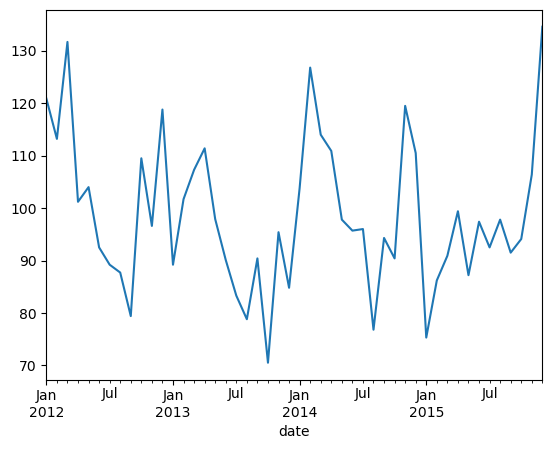

In [21]:
df.resample('M').sum().wind.plot()
plt.show

4. Which year-month combination is the windiest?

df.resample('M').sum().wind.sort_values()

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [22]:
df12[df12.weather=='sun'].shape, df13[df13.weather=='sun'].shape,df14[df14.weather=='sun'].shape,df15[df15.weather=='sun'].shape


((118, 6), (205, 6), (211, 6), (180, 6))

In [23]:
df[df.weather=='sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

6. In which month does it rain the most?

In [24]:
df[df.weather=='rain'].index.month.value_counts().sort_values()

9      4
8      6
7     14
5     16
6     19
4     20
10    20
12    23
11    25
1     35
3     37
2     40
Name: date, dtype: int64

In [25]:
rain=df[df.weather=='rain']
rain.groupby('month').sum()

,precipitation,temp_max,temp_min,wind
month,,,,
April,68.6,276.7,131.6,71.6
August,38.6,162.1,92.8,18.1
December,115.6,181.0,90.9,87.1
February,126.9,373.5,185.5,155.7
January,231.5,303.2,122.7,145.5
July,26.3,314.3,184.4,43.4
June,75.1,343.7,206.7,59.3
March,182.1,392.3,181.5,147.3
May,52.2,246.1,136.8,57.2


7. Which month has the most number of days with a non-zero amount of precipitation?

 <code style="color:green">data.flights_20k()</code>

In [26]:
df['weekday'] = df.index.day_name()
rain=df[df.precipitation>0]
rain.groupby('month').sum()

,precipitation,temp_max,temp_min,wind
month,,,,
April,375.4,772.2,384.1,234.8
August,163.7,528.7,344.5,59.0
December,622.7,728.0,371.1,332.6
February,422.0,712.4,359.8,283.0
January,466.0,567.4,250.8,255.9
July,48.2,236.6,142.2,33.5
June,132.9,717.8,445.5,119.8
March,606.2,841.8,399.3,286.2
May,207.5,525.0,317.2,118.0


**Use the above dataset for the following exercises:**

1. Convert any negative delays to 0.

In [27]:
df=data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


2. Which hour of the day has the highest average delay?

In [28]:
df['delay'] = df['delay'].apply(lambda x: max(0, x))


In [29]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
average_delay_by_hour = df.groupby('hour')['delay'].mean()
hour_with_highest_delay = average_delay_by_hour.idxmax()

In [30]:
hour_with_highest_delay

3

3. Does the day of the week make a difference in the delay amount?

In [31]:
average_delay_by_weekday = df.groupby(df['date'].dt.dayofweek)['delay'].mean()

In [32]:
average_delay_by_weekday

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

**Bonus**

<code style="color:green">data.iowa_electricity()</code>

In [33]:
average_delay_by_month = df.groupby(df['date'].dt.month)['delay'].mean()

In [34]:
average_delay_by_month 

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

**Use the above dataset for the following exercises:**

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

1. Use the sf_temps dataset
2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

**Explore the birdstrikes dataset**

<code style="color:green">df = data.birdstrikes()</code>